# Data Import
#### Bringing in CSV files directly from the Schools management system (KAMAR) via standard export features

In [1]:
import pandas as pd

# Load the data from CSV files
data_2019 = pd.read_csv('Level2_2019.csv')
data_2020 = pd.read_csv('Level2_2020.csv')
data_2021 = pd.read_csv('Level2_2021.csv')
data_2022 = pd.read_csv('Level2_2022.csv')
data_2023 = pd.read_csv('Level2_2023.csv')

# Load the effort data from CSV files
effort_2019 = pd.read_csv('Effort2019.csv')
effort_2020 = pd.read_csv('Effort2020.csv')
effort_2021 = pd.read_csv('Effort2021.csv')
effort_2022 = pd.read_csv('Effort2022.csv')
effort_2023 = pd.read_csv('Effort2023.csv')

# List of columns to extract from student data
columns_to_extract = [
    'StudentID', 'Last Name', 'First Name', 'Gender', 
    'Level 2 Credits Not Achieved', 'Level 2 Credits Achieved', 
    'Level 2 Credits Merit', 'Level 2 Credits Excellence',
    'Internal Level 2 Credits Not Achieved', 'Internal Level 2 Credits Achieved',
    'Internal Level 2 Credits Merit', 'Internal Level 2 Credits Excellence',
    'HalfDays Year Percentage'
]

# Ensure consistent column naming for 'Student ID'
data_2020.rename(columns={'Student ID': 'StudentID'}, inplace=True)
data_2021.rename(columns={'Student ID': 'StudentID'}, inplace=True)
data_2022.rename(columns={'Student ID': 'StudentID'}, inplace=True)
data_2023.rename(columns={'Student ID': 'StudentID'}, inplace=True)

effort_2019.rename(columns={'Student ID': 'StudentID', 'Class Effort 1 - Average - Year': 'Class Effort'}, inplace=True)
effort_2020.rename(columns={'Student ID': 'StudentID', 'Class Effort 1 - Average - Year': 'Class Effort'}, inplace=True)
effort_2021.rename(columns={'Student ID': 'StudentID', 'Class Effort 1 - Average - Year': 'Class Effort'}, inplace=True)
effort_2022.rename(columns={'Student ID': 'StudentID', 'Class Effort 1 - Average - Year': 'Class Effort'}, inplace=True)
effort_2023.rename(columns={'Student ID': 'StudentID', 'Class Effort 1 - Average - Year': 'Class Effort'}, inplace=True)

# Extract the relevant columns from each student dataset
data_2019 = data_2019[columns_to_extract]
data_2020 = data_2020[columns_to_extract]
data_2021 = data_2021[columns_to_extract]
data_2022 = data_2022[columns_to_extract]
data_2023 = data_2023[columns_to_extract]

# Merge effort data with student data based on 'StudentID'
data_2019 = pd.merge(data_2019, effort_2019[['StudentID', 'Class Effort']], on='StudentID', how='left')
data_2020 = pd.merge(data_2020, effort_2020[['StudentID', 'Class Effort']], on='StudentID', how='left')
data_2021 = pd.merge(data_2021, effort_2021[['StudentID', 'Class Effort']], on='StudentID', how='left')
data_2022 = pd.merge(data_2022, effort_2022[['StudentID', 'Class Effort']], on='StudentID', how='left')
data_2023 = pd.merge(data_2023, effort_2023[['StudentID', 'Class Effort']], on='StudentID', how='left')

# Combine the data into a single DataFrame
combined_data = pd.concat([data_2020,data_2020, data_2021, data_2022, data_2023], ignore_index=True)

# Display the first few rows of the combined data
combined_data.head()


,StudentID,Last Name,First Name,Gender,Level 2 Credits Not Achieved,Level 2 Credits Achieved,Level 2 Credits Merit,Level 2 Credits Excellence,Internal Level 2 Credits Not Achieved,Internal Level 2 Credits Achieved,Internal Level 2 Credits Merit,Internal Level 2 Credits Excellence,HalfDays Year Percentage,Class Effort
0,15003,Arthur,Josh,M,12,90,6,0,4,78,6,0,82,3.17
1,15004,Barrett,Anna,F,0,32,29,22,0,28,21,22,66,3.71
2,15005,Brady,Ethan,M,4,37,61,8,4,14,44,8,84,3.68
3,15007,Cousins,Micah,M,27,35,30,30,23,31,18,30,72,3.10
4,15008,Dougherty,Imogen,F,31,36,21,0,31,36,21,0,63,3.21


# Cleanup
#### Check and remove null values from the training data set

In [2]:
# Check for missing values
missing_values = combined_data.isnull().sum()

# Display missing values
print("Missing values in each column:\n", missing_values)

# Remove rows with any missing values
combined_data.dropna(inplace=True)

# Remove rows where all specified columns have zero values
columns_to_check = ['Level 2 Credits Not Achieved', 'Level 2 Credits Achieved', 
                    'Level 2 Credits Merit', 'Level 2 Credits Excellence']

combined_data = combined_data[~(combined_data[columns_to_check] == 0).all(axis=1)]

# Verify that there are no missing values left
missing_values_after = combined_data.isnull().sum()
print("\nMissing values after removing:\n", missing_values_after)

# Display the first few rows of the cleaned data
combined_data.tail()


Missing values in each column:
 StudentID                                0
Last Name                                0
First Name                               0
Gender                                   0
Level 2 Credits Not Achieved             0
Level 2 Credits Achieved                 0
Level 2 Credits Merit                    0
Level 2 Credits Excellence               0
Internal Level 2 Credits Not Achieved    0
Internal Level 2 Credits Achieved        0
Internal Level 2 Credits Merit           0
Internal Level 2 Credits Excellence      0
HalfDays Year Percentage                 0
Class Effort                             2
dtype: int64

Missing values after removing:
 StudentID                                0
Last Name                                0
First Name                               0
Gender                                   0
Level 2 Credits Not Achieved             0
Level 2 Credits Achieved                 0
Level 2 Credits Merit                    0
Level 2 Credits Exc

,StudentID,Last Name,First Name,Gender,Level 2 Credits Not Achieved,Level 2 Credits Achieved,Level 2 Credits Merit,Level 2 Credits Excellence,Internal Level 2 Credits Not Achieved,Internal Level 2 Credits Achieved,Internal Level 2 Credits Merit,Internal Level 2 Credits Excellence,HalfDays Year Percentage,Class Effort
623,20152,Cook,Christopher,M,54,35,0,0,50,35,0,0,82,2.61
624,24001,Lao,Clark,M,15,49,17,0,10,33,17,0,97,3.37
625,23318,Go,Kyla,F,0,2,18,0,0,2,14,0,90,3.87
626,23321,Novais,Bianca,F,14,0,0,0,14,0,0,0,76,3.32
627,23326,Alano,Alliah,F,0,6,0,0,0,6,0,0,93,3.79


# Calculate Endorsement
#### Apply required logic for calculation of Level 2 NCEA Endorsements for students

In [3]:
def calculate_endorsement(row):
    total_credits = (row['Level 2 Credits Achieved'] + 
                     row['Level 2 Credits Merit'] + 
                     row['Level 2 Credits Excellence'])
    merit_excellence_credits = row['Level 2 Credits Merit'] + row['Level 2 Credits Excellence']
    excellence_credits = row['Level 2 Credits Excellence']

    if total_credits >= 60:
        if excellence_credits >= 50:
            return 'Excellence'
        elif merit_excellence_credits >= 50:
            return 'Merit'
        else:
            return 'Achieved'
    else:
        return 'Not Achieved'

# Apply the function to each row in the DataFrame to create the 'Endorsement' column
combined_data['Endorsement'] = combined_data.apply(calculate_endorsement, axis=1)

# Display the first few rows of the DataFrame to verify the new column
combined_data.head()


,StudentID,Last Name,First Name,Gender,Level 2 Credits Not Achieved,Level 2 Credits Achieved,Level 2 Credits Merit,Level 2 Credits Excellence,Internal Level 2 Credits Not Achieved,Internal Level 2 Credits Achieved,Internal Level 2 Credits Merit,Internal Level 2 Credits Excellence,HalfDays Year Percentage,Class Effort,Endorsement
0,15003,Arthur,Josh,M,12,90,6,0,4,78,6,0,82,3.17,Achieved
1,15004,Barrett,Anna,F,0,32,29,22,0,28,21,22,66,3.71,Merit
2,15005,Brady,Ethan,M,4,37,61,8,4,14,44,8,84,3.68,Merit
3,15007,Cousins,Micah,M,27,35,30,30,23,31,18,30,72,3.10,Merit
4,15008,Dougherty,Imogen,F,31,36,21,0,31,36,21,0,63,3.21,Not Achieved


# Calculate Percentages for AME
#### Here have decided to use a percentage based apporach to NA, A, M and E. This is due to the fact that realtime data is incomplete and %age seems the best way to map training data to realtime data for prediction purposes


In [4]:
def calculate_percentages(row):
    total_credits = (row['Internal Level 2 Credits Not Achieved'] + 
                     row['Internal Level 2 Credits Achieved'] + 
                     row['Internal Level 2 Credits Merit'] + 
                     row['Internal Level 2 Credits Excellence'])
    if total_credits > 0:
        row['Percentage Not Achieved'] = (row['Internal Level 2 Credits Not Achieved'] / total_credits) * 100
        row['Percentage Achieved'] = (row['Internal Level 2 Credits Achieved'] / total_credits) * 100
        row['Percentage Merit'] = (row['Internal Level 2 Credits Merit'] / total_credits) * 100
        row['Percentage Excellence'] = (row['Internal Level 2 Credits Excellence'] / total_credits) * 100
    else:
        row['Percentage Not Achieved'] = 0
        row['Percentage Achieved'] = 0
        row['Percentage Merit'] = 0
        row['Percentage Excellence'] = 0
    return row

# Apply the function to each row in the DataFrame to create the percentage columns
combined_data = combined_data.apply(calculate_percentages, axis=1)

# Display the first few rows of the DataFrame to verify the new columns
combined_data.head()


,StudentID,Last Name,First Name,Gender,Level 2 Credits Not Achieved,Level 2 Credits Achieved,Level 2 Credits Merit,Level 2 Credits Excellence,Internal Level 2 Credits Not Achieved,Internal Level 2 Credits Achieved,Internal Level 2 Credits Merit,Internal Level 2 Credits Excellence,HalfDays Year Percentage,Class Effort,Endorsement,Percentage Not Achieved,Percentage Achieved,Percentage Merit,Percentage Excellence
0,15003,Arthur,Josh,M,12,90,6,0,4,78,6,0,82,3.17,Achieved,4.545455,88.636364,6.818182,0.000000
1,15004,Barrett,Anna,F,0,32,29,22,0,28,21,22,66,3.71,Merit,0.000000,39.436620,29.577465,30.985915
2,15005,Brady,Ethan,M,4,37,61,8,4,14,44,8,84,3.68,Merit,5.714286,20.000000,62.857143,11.428571
3,15007,Cousins,Micah,M,27,35,30,30,23,31,18,30,72,3.10,Merit,22.549020,30.392157,17.647059,29.411765
4,15008,Dougherty,Imogen,F,31,36,21,0,31,36,21,0,63,3.21,Not Achieved,35.227273,40.909091,23.863636,0.000000


In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
combined_data['Endorsement'] = label_encoder.fit_transform(combined_data['Endorsement'])


In [6]:
from sklearn.model_selection import train_test_split

# Features and target variable
features = combined_data[['Percentage Not Achieved', 'Percentage Achieved', 'Percentage Merit', 'Percentage Excellence', 'Class Effort']]
target = combined_data['Endorsement']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


Epoch 1/50
13/13 [==============================] - 1s 31ms/step - loss: 8.1736 - accuracy: 0.2296 - val_loss: 1.1597 - val_accuracy: 0.6263
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 1.2380 - accuracy: 0.6454 - val_loss: 1.1683 - val_accuracy: 0.7273
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.8117 - accuracy: 0.7296 - val_loss: 1.0017 - val_accuracy: 0.7374
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6676 - accuracy: 0.7755 - val_loss: 0.9313 - val_accuracy: 0.7172
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.6024 - accuracy: 0.7781 - val_loss: 0.8865 - val_accuracy: 0.7475
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5472 - accuracy: 0.8061 - val_loss: 0.8366 - val_accuracy: 0.7475
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5102 - accuracy: 0.8061 - val_loss: 0.7993 - val_accuracy: 0.7475
Epoch 8/50
13/13 [=

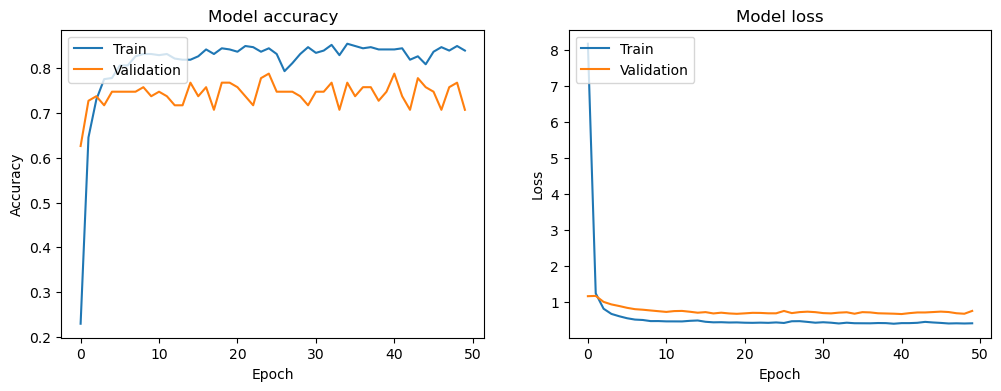

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# One-hot encoding the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [10]:
# Making predictions
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = label_encoder.inverse_transform(y_pred.argmax(axis=1))
y_true_classes = label_encoder.inverse_transform(y_test.argmax(axis=1))

# Display the predictions
for true, pred in zip(y_true_classes[:10], y_pred_classes[:10]):
    print(f'True: {true}, Predicted: {pred}')


4/4 [==============================] - 0s 2ms/step
True: Achieved, Predicted: Achieved
True: Achieved, Predicted: Achieved
True: Not Achieved, Predicted: Not Achieved
True: Not Achieved, Predicted: Not Achieved
True: Merit, Predicted: Merit
True: Merit, Predicted: Merit
True: Merit, Predicted: Merit
True: Merit, Predicted: Merit
True: Achieved, Predicted: Achieved
True: Not Achieved, Predicted: Achieved


In [12]:
# Save the model
model.save('student_endorsement_model.h5')


5/5 [==============================] - 0s 3ms/step
Total Students: 159
Achieved Endorsements: 15 (9.43%)
Merit Endorsements: 29 (18.24%)
Excellence Endorsements: 28 (17.61%)
Passed (Achieved, Merit, Excellence): 72 (45.28%)


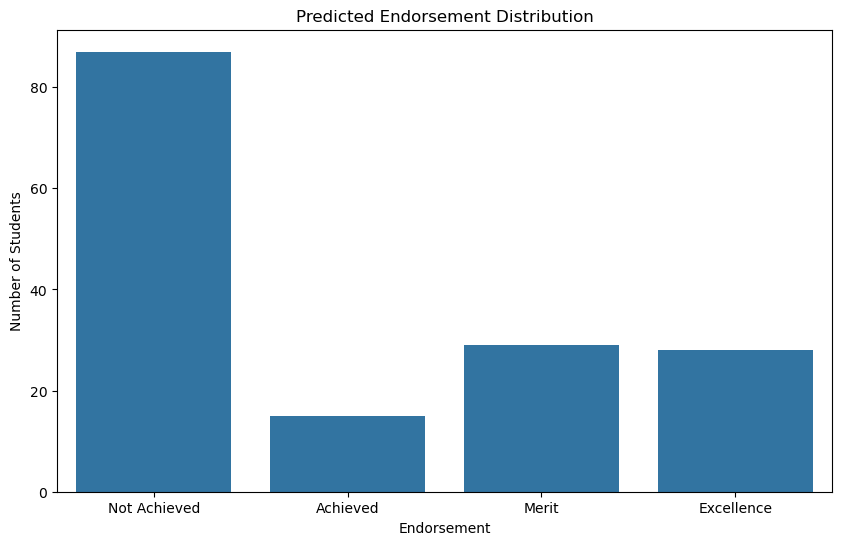

,StudentID,Last Name,First Name,Gender,Internal Level 2 Credits Not Achieved,Internal Level 2 Credits Achieved,Internal Level 2 Credits Merit,Internal Level 2 Credits Excellence,HalfDays Year Percentage,Class Effort,Percentage Not Achieved,Percentage Achieved,Percentage Merit,Percentage Excellence,Predicted Endorsement
0,19625,Roy,Charlie,M,0,29,3,4,91,3.62,0.0,80.555556,8.333333,11.111111,Not Achieved
1,19626,Barrett,Kate,F,0,19,3,3,33,3.78,0.0,76.000000,12.000000,12.000000,Achieved
2,19627,Cousins,Lily,F,0,16,4,0,79,3.02,0.0,80.000000,20.000000,0.000000,Not Achieved
3,19628,Edwards,Bella,F,0,59,7,0,87,3.54,0.0,89.393939,10.606061,0.000000,Not Achieved
4,19632,Leslie,Amber,F,0,58,4,0,89,3.67,0.0,93.548387,6.451613,0.000000,Not Achieved


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf

# Load the current year's data from CSV file
current_year_data = pd.read_csv('Level2_2024.csv')
effort_2024 = pd.read_csv('Effort2024.csv')

# Ensure consistent column naming for 'Student ID'
current_year_data.rename(columns={'Student ID': 'StudentID'}, inplace=True)
effort_2024.rename(columns={'Student ID': 'StudentID', 'Class Effort 1 - Average - Year': 'Class Effort'}, inplace=True)

# List of columns to extract for prediction
columns_to_extract = [
    'StudentID', 'Last Name', 'First Name', 'Gender',
    'Internal Level 2 Credits Not Achieved', 'Internal Level 2 Credits Achieved',
    'Internal Level 2 Credits Merit', 'Internal Level 2 Credits Excellence',
    'HalfDays Year Percentage'
]

# Extract the relevant columns from the current year dataset
current_year_data = current_year_data[columns_to_extract]

# Merge effort data with current year data based on 'StudentID'
current_year_data = pd.merge(current_year_data, effort_2024[['StudentID', 'Class Effort']], on='StudentID', how='left')

# Calculate percentages for each credit category in the current year data
def calculate_percentages(row):
    total_credits = (row['Internal Level 2 Credits Not Achieved'] + 
                     row['Internal Level 2 Credits Achieved'] + 
                     row['Internal Level 2 Credits Merit'] + 
                     row['Internal Level 2 Credits Excellence'])
    if total_credits > 0:
        row['Percentage Not Achieved'] = (row['Internal Level 2 Credits Not Achieved'] / total_credits) * 100
        row['Percentage Achieved'] = (row['Internal Level 2 Credits Achieved'] / total_credits) * 100
        row['Percentage Merit'] = (row['Internal Level 2 Credits Merit'] / total_credits) * 100
        row['Percentage Excellence'] = (row['Internal Level 2 Credits Excellence'] / total_credits) * 100
    else:
        row['Percentage Not Achieved'] = 0
        row['Percentage Achieved'] = 0
        row['Percentage Merit'] = 0
        row['Percentage Excellence'] = 0
    return row

# Apply the function to each row in the current year DataFrame to create the percentage columns
current_year_data = current_year_data.apply(calculate_percentages, axis=1)

# Select features for prediction based on the features used during training
X_current_year = current_year_data[[
    'Percentage Not Achieved', 'Percentage Achieved',
    'Percentage Merit', 'Percentage Excellence', 'Class Effort'
]]

# Standardize the features
scaler = StandardScaler()
X_current_year_scaled = scaler.fit_transform(X_current_year)

# Load the trained neural network model
model = tf.keras.models.load_model('student_endorsement_model.h5')

# Predict the endorsement using the neural network model
current_year_predictions = model.predict(X_current_year_scaled)

# Convert predictions from one-hot encoding to class labels
label_encoder_endorsement = LabelEncoder()
label_encoder_endorsement.fit(['Not Achieved', 'Achieved', 'Merit', 'Excellence'])
current_year_data['Predicted Endorsement'] = label_encoder_endorsement.inverse_transform(current_year_predictions.argmax(axis=1))

# Calculate the percentage of students predicted to get Achieved (A), Merit (M), and Excellence (E)
total_students = len(current_year_data)
achieved_count = sum(current_year_data['Predicted Endorsement'] == 'Achieved')
merit_count = sum(current_year_data['Predicted Endorsement'] == 'Merit')
excellence_count = sum(current_year_data['Predicted Endorsement'] == 'Excellence')

achieved_percentage = (achieved_count / total_students) * 100
merit_percentage = (merit_count / total_students) * 100
excellence_percentage = (excellence_count / total_students) * 100

# Calculate the percentage of students who passed (Achieved, Merit, or Excellence)
passed_count = achieved_count + merit_count + excellence_count
passed_percentage = (passed_count / total_students) * 100

# Display the results
print(f"Total Students: {total_students}")
print(f"Achieved Endorsements: {achieved_count} ({achieved_percentage:.2f}%)")
print(f"Merit Endorsements: {merit_count} ({merit_percentage:.2f}%)")
print(f"Excellence Endorsements: {excellence_count} ({excellence_percentage:.2f}%)")
print(f"Passed (Achieved, Merit, Excellence): {passed_count} ({passed_percentage:.2f}%)")

# Plot the predicted endorsement distributions
plt.figure(figsize=(10, 6))
sns.countplot(x='Predicted Endorsement', data=current_year_data, order=['Not Achieved', 'Achieved', 'Merit', 'Excellence'])
plt.title('Predicted Endorsement Distribution')
plt.xlabel('Endorsement')
plt.ylabel('Number of Students')
plt.show()

# Display the first few rows of the current year data with predictions
current_year_data.head()
